# 7. Capstone Project - Hyperparameter Optimization; Random Forest

#### Loading data and libralies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Original data set
original_df = pd.read_csv("./capstone_clean_heart_disease_fe.csv")

# Train set : Under sampled data set and Over sampled data set
under_sampled_df = pd.read_csv("./under_sampled_df_fe.csv")
over_sampled_df = pd.read_csv("./over_sampled_df_fe.csv")
# Test set : Under sampled data set and Over sampled data set
test_sampled_df = pd.read_csv("./test_sampled_df_fe.csv")
               
# Train set : SMOTE data set         
smote_df = pd.read_csv("./smote_df.csv")
# Test set : SMOTE data set  
test_smote_df = pd.read_csv("./test_smote_df.csv")

Split each dataset into train set and test set

In [4]:
# Split the original data set into train and test set
X = original_df.drop(columns="HeartDisease")
y = original_df["HeartDisease"]

from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.3, random_state=42)

In [5]:
# Split other data set into X and y
X_train_under = under_sampled_df.drop(columns="HeartDisease")
y_train_under = under_sampled_df["HeartDisease"]

X_train_over = over_sampled_df.drop(columns="HeartDisease")
y_train_over = over_sampled_df["HeartDisease"]

X_test_sampled = test_sampled_df.drop(columns="HeartDisease")
y_test_sampled = test_sampled_df["HeartDisease"]

X_train_smote = smote_df.drop(columns="HeartDisease")
y_train_smote = smote_df["HeartDisease"]

X_test_smote = test_smote_df.drop(columns="HeartDisease")
y_test_smote = test_smote_df["HeartDisease"]

In [6]:
X_train = [X_train_original, X_train_under, X_train_over, X_train_smote]
X_test = [X_test_original, X_test_sampled, X_test_sampled, X_test_smote]
y_train = [y_train_original, y_train_under, y_train_over,y_train_smote]
y_test = [y_test_original, y_test_sampled, y_test_sampled, y_test_smote]

train_score = []
test_score = []

for index in range(4):
    
    scaler = StandardScaler()
    scaler.fit(X_train[index])
    X_scaled_train = scaler.transform(X_train[index])
    X_scaled_test = scaler.transform(X_test[index])
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled_train,y_train[index])
    
    train_score.append(model.score(X_scaled_train,y_train[index])*100)
    test_score.append(model.score(X_scaled_test,y_test[index])*100)

In [7]:
before_selection = pd.DataFrame((train_score, test_score), columns=["Original", "Under Sampled", "Over Sampled", "SMOTE"], 
                                index=["Train score", "Test score"])
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


**Festure selection: RFE**  
The columns that I'll use for modeling

In [8]:
# RFE : Original data final

from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

rfe_original = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=7)
rfe_original.fit(X_scaled_train,y_train_original)
    
train_score_or_rfe = rfe_original.score(X_scaled_train,y_train_original)
test_score_or_rfe = rfe_original.score(X_scaled_test,y_test_original)

In [9]:
X_train_original.loc[:, rfe_original.support_]

,BMI,Smoking,DiffWalking,Sex,AgeCategory,GenHealth,Asthma
176993,27.12,1,0,1,35,3,0
267593,30.23,0,0,0,18,2,0
175707,32.55,0,0,1,60,3,0
317039,33.07,0,0,0,55,3,0
262926,23.06,0,0,1,30,4,0
...,...,...,...,...,...,...,...
119879,26.62,0,0,0,40,4,0
259178,25.04,0,0,1,25,4,0
131932,36.05,0,0,0,18,1,0
146867,27.44,0,0,0,40,3,0


In [10]:
# RFE : Under sampled data final

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_under = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=9)
rfe_under.fit(X_scaled_train,y_train_under)
    
train_score_u_rfe = rfe_under.score(X_scaled_train,y_train_under)
test_score_u_rfe = rfe_under.score(X_scaled_test,y_test_sampled)

In [11]:
X_train_under.loc[:, rfe_under.support_]

,Smoking,AlcoholDrinking,PhysicalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,1,0,0.0,0,1,65,1,0,0
1,0,0,5.0,0,0,80,0,0,0
2,0,0,0.0,0,0,40,4,0,0
3,0,0,7.0,1,0,60,2,0,0
4,1,0,0.0,0,1,70,3,0,0
...,...,...,...,...,...,...,...,...,...
38177,0,0,0.0,0,1,75,3,0,0
38178,0,0,30.0,1,0,50,0,0,0
38179,0,0,0.0,0,0,75,2,0,0
38180,1,0,15.0,0,1,70,3,0,0


In [12]:
# RFE : Over sampled data final

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_over = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=11)
rfe_over.fit(X_scaled_train,y_train_over)
    
train_score_ov_rfe = rfe_over.score(X_scaled_train,y_train_over)
test_score_ov_rfe = rfe_over.score(X_scaled_test,y_test_sampled)

In [13]:
X_train_over.loc[:, rfe_over.support_]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,27.12,1,0,0.0,2.0,0,1,35,3,0,0
1,30.23,0,0,0.0,0.0,0,0,18,2,0,0
2,32.55,0,0,0.0,0.0,0,1,60,3,0,0
3,33.07,0,0,0.0,0.0,0,0,55,3,0,0
4,23.06,0,0,0.0,0.0,0,1,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,0,0,30.0,0.0,1,0,60,2,0,0
408516,24.41,0,0,0.0,0.0,0,1,65,2,0,0
408517,33.00,0,0,0.0,0.0,0,1,60,1,0,0
408518,31.32,1,0,3.0,2.0,0,0,65,2,1,0


In [14]:
# RFE : SMOTE data final

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)
    
rfe_smote = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=10)
rfe_smote.fit(X_scaled_train,y_train_smote)
    
train_score_s_rfe = rfe_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfe = rfe_smote.score(X_scaled_test,y_test_smote)

In [15]:
X_train_smote.loc[:, rfe_smote.support_]

,AlcoholDrinking,AgeCategory,GenHealth,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,35,3,0,0,0,0,0,0,1
1,0,18,2,0,0,0,0,1,0,0
2,0,60,3,0,0,0,0,0,0,1
3,0,55,3,0,0,0,0,1,0,0
4,0,30,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
408515,0,80,1,0,0,0,0,0,0,1
408516,0,65,3,0,0,0,0,0,0,1
408517,0,70,2,0,0,0,0,0,0,0
408518,0,75,2,0,0,0,0,0,0,1


### Optimizing Hyperparameters: Random Forest

### Baseline Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

In [32]:
def R_forest(X_train, y_train, X_test, y_test):
    
    RF_model = RandomForestClassifier()
    RF_model.fit(X_train, y_train)
    
    train_score = RF_model.score(X_train, y_train)
    test_score = RF_model.score(X_test, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = RF_model.predict(X_test)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

In [33]:
def R_forest_w_normalize(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    RF_model = RandomForestClassifier()
    RF_model.fit(X_scaled_train, y_train)
    
    train_score = RF_model.score(X_scaled_train, y_train)
    test_score = RF_model.score(X_scaled_test, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = RF_model.predict(X_scaled_test)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

In [34]:
def R_forest_w_pca_normalize(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    
    my_PCA = PCA()
    my_PCA.fit(X_scaled_train)

    X_train_PCA = my_PCA.transform(X_scaled_train)
    X_test_PCA = my_PCA.transform(X_scaled_test)   
    
    RF_model = RandomForestClassifier()
    RF_model.fit(X_train_PCA, y_train)
    
    train_score = RF_model.score(X_train_PCA, y_train)
    test_score = RF_model.score(X_test_PCA, y_test)
    
    # Evaluation(precision & Recall)
    y_pred = RF_model.predict(X_test_PCA)

    report_initial = classification_report(y_test, y_pred)
    
    return print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

**Original data**

In [23]:
print("Before normalization and reducing dimention\n")

print("Original dataset")
R_forest(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Before normalization and reducing dimention

Original dataset
Train score: 0.9625656477920403
Test score: 0.8874971270972191
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     87544
           1       0.26      0.18      0.21      8178

    accuracy                           0.89     95722
   macro avg       0.59      0.57      0.58     95722
weighted avg       0.87      0.89      0.88     95722



In [24]:
print("Only normalization\n")

print("Original dataset")
R_forest_w_normalize(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Only normalization

Original dataset
Train score: 0.9625477387609637
Test score: 0.8872672948747414
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     87544
           1       0.26      0.18      0.21      8178

    accuracy                           0.89     95722
   macro avg       0.59      0.57      0.58     95722
weighted avg       0.87      0.89      0.88     95722



In [119]:
print("Normalization and reducing dimention\n")

print("Original dataset")
R_forest_w_pca_normalize(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Normalization and reducing dimention

Original dataset
Train score: 0.9626148976275011
Test score: 0.8910804203840288
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     87544
           1       0.27      0.16      0.20      8178

    accuracy                           0.89     95722
   macro avg       0.60      0.56      0.57     95722
weighted avg       0.87      0.89      0.88     95722



The test score became a little bit higher when the model is with PCA. However, the recall score for 1 became 0. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

**Under Sampled data**

In [26]:
print("Before normalization and reducing dimention\n")

print("Under sampled dataset")
R_forest(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Before normalization and reducing dimention

Under sampled dataset
Train score: 0.8012152323084176
Test score: 0.7071728547251416
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     87544
           1       0.19      0.77      0.31      8178

    accuracy                           0.71     95722
   macro avg       0.58      0.74      0.56     95722
weighted avg       0.90      0.71      0.77     95722



In [27]:
print("Only normalization\n")

print("Under sampled dataset")
R_forest_w_normalize(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Only normalization

Under sampled dataset
Train score: 0.8011890419569431
Test score: 0.7087816802824847
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     87544
           1       0.19      0.77      0.31      8178

    accuracy                           0.71     95722
   macro avg       0.58      0.74      0.56     95722
weighted avg       0.90      0.71      0.77     95722



In [120]:
print("Normalization and reducing dimention\n")

print("Under sampled dataset")
R_forest_w_pca_normalize(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Normalization and reducing dimention

Under sampled dataset
Train score: 0.8012152323084176
Test score: 0.70601324669355
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     87544
           1       0.19      0.77      0.31      8178

    accuracy                           0.71     95722
   macro avg       0.58      0.73      0.56     95722
weighted avg       0.90      0.71      0.77     95722



The both scores of test and recall for 1 became lower when the model is with PCA. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

**Over Sampled data**

In [29]:
print("Before normalization and reducing dimention\n")

print("Over sampled dataset")
R_forest(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Before normalization and reducing dimention

Over sampled dataset
Train score: 0.9753035347106629
Test score: 0.8478719625582416
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87544
           1       0.20      0.26      0.23      8178

    accuracy                           0.85     95722
   macro avg       0.56      0.58      0.57     95722
weighted avg       0.87      0.85      0.86     95722



In [30]:
print("Only normalization\n")

print("Over sampled dataset")
R_forest_w_normalize(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Only normalization

Over sampled dataset
Train score: 0.975301086850093
Test score: 0.8483107331647897
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87544
           1       0.20      0.26      0.23      8178

    accuracy                           0.85     95722
   macro avg       0.57      0.58      0.57     95722
weighted avg       0.87      0.85      0.86     95722



In [121]:
print("Normalization and reducing dimention\n")

print("Over sampled dataset")
R_forest_w_pca_normalize(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Normalization and reducing dimention

Over sampled dataset
Train score: 0.9753084304318026
Test score: 0.8531998913520403
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     87544
           1       0.21      0.25      0.23      8178

    accuracy                           0.85     95722
   macro avg       0.57      0.58      0.57     95722
weighted avg       0.87      0.85      0.86     95722



The test score increased when it's with PCA. However, the recall score for 1 became 0. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

**SMOTE data**

In [32]:
print("Before normalization and reducing dimention\n")

print("SMOTE dataset")
R_forest(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Before normalization and reducing dimention

SMOTE dataset
Train score: 0.8059654362087535
Test score: 0.7534422598775621
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



In [33]:
print("Only normalization\n")

print("SMOTE dataset")
R_forest_w_normalize(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Only normalization

SMOTE dataset
Train score: 0.8059678840693234
Test score: 0.7534527067967657
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



In [122]:
print("Normalization and reducing dimention\n")

print("SMOTE dataset")
R_forest_w_pca_normalize(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Normalization and reducing dimention

SMOTE dataset
Train score: 0.8059629883481837
Test score: 0.7530870646246421
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



The test score became slightly lower when the model is with PCA. Also, the other evaluation scores became lower. Therefore, I'll do GridSearch with no PCA. Then I'll check if the model is better with PCA.

### GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def RF_gridsearch(num_tree, depth, split, leaf, X_train, y_train, X_test, y_test):
    RF_param = {
            'n_estimators': num_tree,
            'max_depth': depth,
            'min_samples_split': split,
            'min_samples_leaf': leaf,
            'max_features': ["sqrt", "log2", None],
        #    'criterion': ["gini", "entropy", "log_loss"],
            'random_state': [42]
        }

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)
    

    # Create Randomized Search
    clf = GridSearchCV(RandomForestClassifier(), RF_param, cv=5, scoring="f1")
    # Fit the model
    clf.fit(X_scaled_train, y_train)
    
    # prediction and evaluation
    y_pred = clf.predict(X_scaled_test)
    score = f1_score(y_test, y_pred)

    
    # Result
    best_clf = clf.best_estimator_
    print('Hyperparameter :\n', best_clf)
    print('Train score:\n', best_clf.score(X_scaled_train, y_train))
    print('Test score:\n', best_clf.score(X_scaled_test, y_test))
    print(f"Best F1 Score: {score}")

GridSearch takes too long time, so I'll use sample rows from each datasets. Thefore, I'll take samples and do GridSearch.

In [21]:
# Take samples for GridSearch

X_GS_original, X_rest_original, y_GS_original, y_rest_original = \
                train_test_split(X_train_original.loc[:, rfe_original.support_], y_train_original, train_size = 0.1, random_state=42)

X_GS_under, X_rest_under, y_GS_under, y_rest_under = \
                train_test_split(X_train_under.loc[:, rfe_under.support_], y_train_under, train_size = 0.1, random_state=42)

X_GS_over, X_rest_over, y_GS_over, y_rest_over = \
                train_test_split(X_train_over.loc[:, rfe_over.support_], y_train_over, train_size = 0.1, random_state=42)

X_GS_smote, X_rest_smote, y_GS_smote, y_rest_smote = \
                train_test_split(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, train_size = 0.1, random_state=42)

**Original data**

train size = 0.1　　 

In [105]:
%%time

num_tree = [10, 100, 500]
depth = [10, 20, 30, None]
split = [2, 5, 10]
leaf =  [1, 2, 4]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_original, y_GS_original, \
        X_test_original.loc[:, rfe_original.support_], y_test_original)

Hyperparameter :
 RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)
Train score:
 0.9883143049026192
Test score:
 0.8789724410271411
Best F1 Score: 0.20666986235704993
CPU times: total: 1h 14min 34s
Wall time: 1h 15min 34s


The parameter of max_depth is on the edge of the range, so max_depth could be higher. Therefore, I'll set the range higher and check the accuracy score.

In [117]:
%%time

num_tree = [10, 100, 500]
depth = [30, 40, 50, None]
split = [2, 5, 10]
leaf =  [1, 2, 4]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_original, y_GS_original, \
        X_test_original.loc[:, rfe_original.support_], y_test_original)

Hyperparameter :
 RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)
Train score:
 0.9883143049026192
Test score:
 0.8789724410271411
Best F1 Score: 0.20666986235704993
CPU times: total: 1h 2min 48s
Wall time: 1h 38min 22s


The parameter of max_depth is still 30. So, I'll use max_depth=30. Also, the parameter of n_estimators is 500, and it's on the edge of the range. I'll check some values for n_estimators.

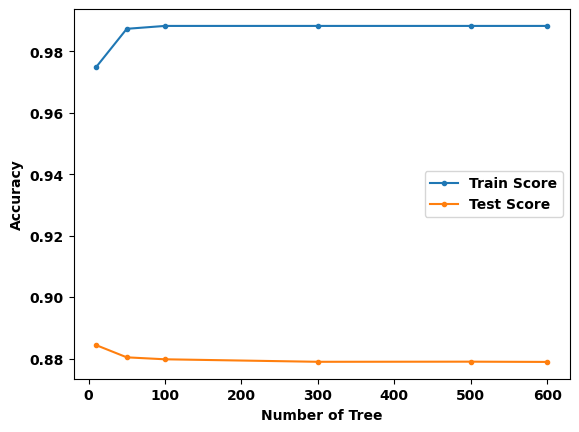

,tree:10,tree:50,tree:100,tree:300,tree:500,tree:600
Train Score,0.974927,0.987374,0.988314,0.988314,0.988314,0.988314
Test Score,0.884353,0.880383,0.879746,0.878931,0.878972,0.878889
F1 Score,0.193384,0.204640,0.206740,0.205852,0.206670,0.206774


In [23]:
num_tree = [10, 50, 100, 300, 500, 600]

train_scores = []
test_scores = []
f1_scores = []

scaler = StandardScaler()
scaler.fit(X_GS_original)
X_scaled_train = scaler.transform(X_GS_original)
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
    
    
for num in num_tree:
    RF_model = RandomForestClassifier(max_depth=30, n_estimators=num, random_state=42)

    RF_model.fit(X_scaled_train, y_GS_original)
    
    train_scores.append(RF_model.score(X_scaled_train, y_GS_original))
    test_scores.append(RF_model.score(X_scaled_test, y_test_original))
    
    y_pred = RF_model.predict(X_scaled_test)
    f1_scores.append(f1_score(y_test_original, y_pred, pos_label=1))    
    
# plot
plt.figure()
plt.plot(num_tree, train_scores, label="Train Score",marker='.')
plt.plot(num_tree, test_scores,label="Test Score",marker='.')
plt.xlabel('Number of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

score_data = [train_scores, test_scores, f1_scores]
score_original = pd.DataFrame(score_data, columns=["tree:10", "tree:50" , "tree:100", "tree:300", "tree:500", "tree:600"], 
                              index=["Train Score", "Test Score", "F1 Score"])

score_original

The test score with n_estimators=10 is the best. However, The f1 score with n_estimators=100 is the highest. Therefore, I'll use n_estimators=100 for creating the model.

I'll check the model accuracy with/without PCA.

In [28]:
# Without PCA

scaler = StandardScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
        
RF_model = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)
RF_model.fit(X_scaled_train, y_train_original)
    
train_score = RF_model.score(X_scaled_train, y_train_original)
test_score = RF_model.score(X_scaled_test, y_test_original)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_scaled_test)

report_initial = classification_report(y_test_original, y_pred)

print("With no PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With no PCA

Train score: 0.9625432615031945
Test score: 0.8876642778044754
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     87544
           1       0.27      0.18      0.21      8178

    accuracy                           0.89     95722
   macro avg       0.60      0.57      0.58     95722
weighted avg       0.87      0.89      0.88     95722



In [37]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
      
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)
RF_model.fit(X_train_PCA, y_train_original)
    
train_score = RF_model.score(X_train_PCA, y_train_original)
test_score = RF_model.score(X_test_PCA, y_test_original)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_test_PCA)

report_initial = classification_report(y_test_original, y_pred)

print("With PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With PCA

Train score: 0.9624402845745038
Test score: 0.8922400284156202
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     87544
           1       0.27      0.16      0.20      8178

    accuracy                           0.89     95722
   macro avg       0.60      0.56      0.57     95722
weighted avg       0.87      0.89      0.88     95722



The test score of the model with PCA is better than the one without PCA. However, f1 score of the model with PCA is better than the other. Therefore, I'll evaluate the model without PCA.

In [30]:
scaler = StandardScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
    
RF_model_original = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

RF_model_original.fit(X_scaled_train, y_train_original)
    
train_score = RF_model_original.score(X_scaled_train, y_train_original)
test_score = RF_model_original.score(X_scaled_test, y_test_original)
    
    # Evaluation(precision & Recall)
y_pred = RF_model_original.predict(X_scaled_test)

report_initial = classification_report(y_test_original, y_pred)

print("After optimization\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

After optimization

Train score: 0.9625432615031945
Test score: 0.8876642778044754
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     87544
           1       0.27      0.18      0.21      8178

    accuracy                           0.89     95722
   macro avg       0.60      0.57      0.58     95722
weighted avg       0.87      0.89      0.88     95722



In [35]:
print("Before optimization\n")

R_forest_w_normalize(X_train_original.loc[:, rfe_original.support_], y_train_original, \
            X_test_original.loc[:, rfe_original.support_], y_test_original)

Before optimization

Train score: 0.962583556823117
Test score: 0.8874448925012014
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     87544
           1       0.26      0.18      0.21      8178

    accuracy                           0.89     95722
   macro avg       0.59      0.57      0.58     95722
weighted avg       0.87      0.89      0.88     95722



The test score bemace better slightly. However, recall score for 1 is too low, so this model cannot be my final model.

**Under sampled data**

train size = 0.1　

In [102]:
%%time

num_tree = [10, 100, 500]
depth = [10, 20, 30, None]
split = [2, 5, 10]
leaf =  [1, 2, 4]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_under, y_GS_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Hyperparameter :
 RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)
Train score:
 0.786013619696176
Test score:
 0.7035477737615178
Best F1 Score: 0.31672726397149115
CPU times: total: 12min 1s
Wall time: 13min 17s


All hyperparameters of max_depth, sample_split, and sample_leaf are on edge of the range. So, all the best parameters might be higher/lower. Therefore, I'll set the range of sample_split and sample_leaf parameters higher than above and do GridSearch.

In [106]:
%%time

num_tree = [10, 100, 500]
depth = [10, 20, 30, None]
split = [10, 15, 20]
leaf =  [4, 6, 8, 10]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_under, y_GS_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Hyperparameter :
 RandomForestClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=20,
                       n_estimators=10, random_state=42)
Train score:
 0.7778941854374017
Test score:
 0.7183197175153048
Best F1 Score: 0.323981446659145
CPU times: total: 12min 34s
Wall time: 12min 44s


The min_samples_split parameter is still on the edge. Therefore, I'll set the range of sample_split parameter higher than above and more detail number for other patameters.

In [124]:
%%time

num_tree = [10, 20, 30]
depth = [15, 20, 25, None]
split = [15, 20, 25]
leaf =  [4, 6, 8, 10]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_under, y_GS_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Hyperparameter :
 RandomForestClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=20,
                       n_estimators=10, random_state=42)
Train score:
 0.7778941854374017
Test score:
 0.7183197175153048
Best F1 Score: 0.323981446659145
CPU times: total: 32.7 s
Wall time: 1min 59s


Even I used more detail number, the best hyperparameters didn't change. Therefore, I'll use these hyperparameters and check if this model work better with PCA.

I'll check the model accuracy with/without PCA.

In [38]:
# Without PCA

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
     
RF_model = RandomForestClassifier(max_depth=20, min_samples_leaf=6, 
                                  min_samples_split=20,n_estimators=10, random_state=42)
RF_model.fit(X_scaled_train, y_train_under)
    
train_score = RF_model.score(X_scaled_train, y_train_under)
test_score = RF_model.score(X_scaled_test, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)

print("With no PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With no PCA

Train score: 0.7682677701534755
Test score: 0.7126992749838073
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     87544
           1       0.20      0.80      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.78     95722



In [36]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
   
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model = RandomForestClassifier(max_depth=20, min_samples_leaf=6, 
                                  min_samples_split=20,n_estimators=10, random_state=42)
RF_model.fit(X_train_PCA, y_train_under)
    
train_score = RF_model.score(X_train_PCA, y_train_under)
test_score = RF_model.score(X_test_PCA, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("With PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With PCA

Train score: 0.7811010423759887
Test score: 0.7131171517519483
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.79      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.78     95722



The test score of the model with PCA is slightly better. Also, the both recall scores are almost same. Therefore, I'll evaluate the model with PCA.

In [39]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
   
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model_under = RandomForestClassifier(max_depth=20, min_samples_leaf=6, 
                                  min_samples_split=20,n_estimators=10, random_state=42)
RF_model_under.fit(X_train_PCA, y_train_under)
    
train_score = RF_model_under.score(X_train_PCA, y_train_under)
test_score = RF_model_under.score(X_test_PCA, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model_under.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("After optimization\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

After optimization

Train score: 0.7811010423759887
Test score: 0.7131171517519483
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.79      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.78     95722



In [40]:
print("Before optimization\n")

R_forest_w_normalize(X_train_under.loc[:, rfe_under.support_], y_train_under, \
        X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

Before optimization

Train score: 0.8011628516054685
Test score: 0.7102024612941643
              precision    recall  f1-score   support

           0       0.97      0.70      0.82     87544
           1       0.20      0.77      0.31      8178

    accuracy                           0.71     95722
   macro avg       0.58      0.74      0.56     95722
weighted avg       0.90      0.71      0.77     95722



The test score and other evaluation scores after optimizing became slightly better. Also, the recall score for 1 is almost 0.80 and as high as the models I'm keeping for final model comparison. Therefore, I'll compare this model to other models of RandomForest at the end.

**Over sampled data**

train size = 0.1　　

In [104]:
%%time

num_tree = [10, 100, 500]
depth = [10, 20, 30, None]
split = [2, 5, 10]
leaf =  [1, 2, 4]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_over, y_GS_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Hyperparameter :
 RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)
Train score:
 0.9497454225007343
Test score:
 0.7317440086918368
Best F1 Score: 0.31158176943699734
CPU times: total: 3h 11min 51s
Wall time: 3h 13min 50s


The parameter of n_estimators is on the edge of the range, so I'll try other values of n_estimators.

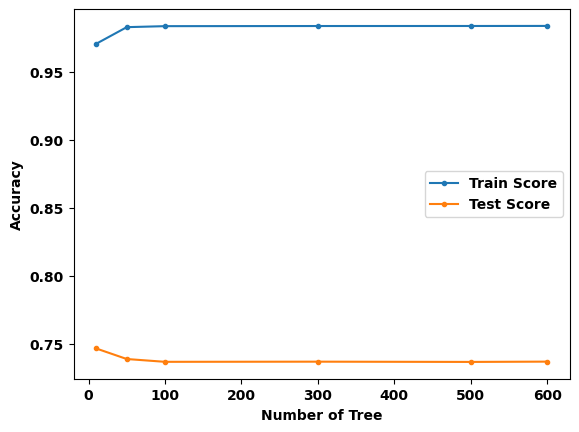

,tree:10,tree:50,tree:100,tree:300,tree:500,tree:600
Train Score,0.970430,0.982645,0.983379,0.983477,0.983501,0.983550
Test Score,0.746673,0.738931,0.736873,0.736988,0.736800,0.737020
F1 Score,0.291317,0.298270,0.297845,0.297584,0.297709,0.298001


In [27]:
num_tree = [10, 50, 100, 300, 500, 600]

train_scores = []
test_scores = []
f1_scores = []

scaler = StandardScaler()
scaler.fit(X_GS_over)
X_scaled_train = scaler.transform(X_GS_over)
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
    
for num in num_tree:
    RF_model = RandomForestClassifier(max_depth=30, n_estimators=num, random_state=42)

    RF_model.fit(X_scaled_train, y_GS_over)
    
    train_scores.append(RF_model.score(X_scaled_train, y_GS_over))
    test_scores.append(RF_model.score(X_scaled_test, y_test_sampled))

    y_pred = RF_model.predict(X_scaled_test)
    f1_scores.append(f1_score(y_test_sampled, y_pred, pos_label=1))    
    
    
# plot
plt.figure()
plt.plot(num_tree, train_scores, label="Train Score",marker='.')
plt.plot(num_tree, test_scores,label="Test Score",marker='.')
plt.xlabel('Number of Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show();


score_data = [train_scores, test_scores, f1_scores]
score_over = pd.DataFrame(score_data, columns=["tree:10", "tree:50" , "tree:100", "tree:300", "tree:500", "tree:600"],
                          index=["Train Score", "Test Score", "F1 Score"])

score_over

The test score with n_estimators=10 is the highest. However, The f1 score with n_estimators=50 is the best. Therefore, I'll use n_estimators=50 for creating a model.

I'll check the model accuracy with/without PCA.

In [41]:
# Without PCA

scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
     
RF_model = RandomForestClassifier(max_depth=30, n_estimators=50, random_state=42)
RF_model.fit(X_scaled_train, y_train_over)
    
train_score = RF_model.score(X_scaled_train, y_train_over)
test_score = RF_model.score(X_scaled_test, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_scaled_test)

report_initial = classification_report(y_test_sampled, y_pred)

print("With no PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With no PCA

Train score: 0.9723440712816998
Test score: 0.8462840308393055
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     87544
           1       0.21      0.28      0.24      8178

    accuracy                           0.85     95722
   macro avg       0.57      0.59      0.58     95722
weighted avg       0.87      0.85      0.86     95722



In [43]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
 
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model = RandomForestClassifier(max_depth=30, n_estimators=50, random_state=42)
RF_model.fit(X_train_PCA, y_train_over)
    
train_score = RF_model.score(X_train_PCA, y_train_over)
test_score = RF_model.score(X_test_PCA, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("With PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With PCA

Train score: 0.9716292959953001
Test score: 0.8479137502350557
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87544
           1       0.22      0.30      0.25      8178

    accuracy                           0.85     95722
   macro avg       0.58      0.60      0.58     95722
weighted avg       0.87      0.85      0.86     95722



The model with PCA improved a little bit. Therefore, I'll use the model with PCA for evaluating the model.

In [45]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
 
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model = RandomForestClassifier(max_depth=30, n_estimators=50, random_state=42)
RF_model.fit(X_train_PCA, y_train_over)
    
train_score = RF_model.score(X_train_PCA, y_train_over)
test_score = RF_model.score(X_test_PCA, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)
   
print("After optimization\n")    
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

After optimization

Train score: 0.9716292959953001
Test score: 0.8479137502350557
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87544
           1       0.22      0.30      0.25      8178

    accuracy                           0.85     95722
   macro avg       0.58      0.60      0.58     95722
weighted avg       0.87      0.85      0.86     95722



In [44]:
print("Before optimization\n")

R_forest_w_normalize(X_train_over.loc[:, rfe_over.support_], y_train_over, \
        X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

Before optimization

Train score: 0.9752937432683835
Test score: 0.8481540293767368
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87544
           1       0.20      0.26      0.23      8178

    accuracy                           0.85     95722
   macro avg       0.57      0.58      0.57     95722
weighted avg       0.87      0.85      0.86     95722



The test score became lower, but the precision and recall score for 1 improved. However, the recall and f1 score for 1 are too low. Therefor, this model cannot be my final model.

**SMOTE data**

train size = 0.1　　

In [103]:
%%time

num_tree = [10, 100, 500]
depth = [10, 20, 30, None]
split = [2, 5, 10]
leaf =  [1, 2, 4]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_smote, y_GS_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Hyperparameter :
 RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
Train score:
 0.8060315284441398
Test score:
 0.7519065627546436
Best F1 Score: 0.3060604289638244
CPU times: total: 45min 9s
Wall time: 47min 39s


All the hyperparameters are within the range. I'll set mode detail number and do GridSearch.

In [114]:
%%time

num_tree = [10, 50, 100]
depth = [16, 18, 20, None]
split = [4, 5, 6]
leaf =  [1, 2, 3]

RF_gridsearch(num_tree, depth, split, leaf, X_GS_smote, y_GS_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Hyperparameter :
 RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)
Train score:
 0.805958092627044
Test score:
 0.751655836693759
Best F1 Score: 0.30560261728106564
CPU times: total: 4min 46s
Wall time: 4min 54s


The both score of test and f1 became lower. Therefore, I'll use the hyperparameters one before and check if this model work better with PCA.

In [127]:
# Without PCA

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
     
RF_model = RandomForestClassifier(max_depth=18, min_samples_leaf=2, 
                                  min_samples_split=5,n_estimators=50, random_state=42)
RF_model.fit(X_scaled_train, y_train_smote)
    
train_score = RF_model.score(X_scaled_train, y_train_smote)
test_score = RF_model.score(X_scaled_test, y_test_smote)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)

print("With no PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With no PCA

Train score: 0.8058503867619701
Test score: 0.753598963665615
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



In [48]:
# With PCA

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
   
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model = RandomForestClassifier(max_depth=18, min_samples_leaf=2, 
                                  min_samples_split=5,n_estimators=50, random_state=42)
RF_model.fit(X_train_PCA, y_train_smote)
    
train_score = RF_model.score(X_train_PCA, y_train_smote)
test_score = RF_model.score(X_test_PCA, y_test_smote)
    
    # Evaluation(precision & Recall)
y_pred = RF_model.predict(X_test_PCA)

report_initial = classification_report(y_test_smote, y_pred)

print("With PCA\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

With PCA

Train score: 0.8058650739253892
Test score: 0.7535153883119868
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



All scores are almost the same. However, the test score without PCA is slightly better. So, I'll use the model without PCA for evaluating the model.

In [46]:
scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
     
RF_model_smote = RandomForestClassifier(max_depth=18, min_samples_leaf=2, 
                                  min_samples_split=5,n_estimators=50, random_state=42)
RF_model_smote.fit(X_scaled_train, y_train_smote)
    
train_score = RF_model_smote.score(X_scaled_train, y_train_smote)
test_score = RF_model_smote.score(X_scaled_test, y_test_smote)
    
    # Evaluation(precision & Recall)
y_pred = RF_model_smote.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)

print("After optimization\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

After optimization

Train score: 0.8058503867619701
Test score: 0.753598963665615
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



In [47]:
print("Before optimization\n")

R_forest_w_normalize(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, \
        X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

Before optimization

Train score: 0.8059678840693234
Test score: 0.7534422598775621
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



The test score of the model after optimizing improved slightly, but the other scores are exact same. However, the model has better test score than the other models, so I'll compare this model to the other models.

### Model Comparison

In [50]:
# Under sampled data

scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
   
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)   
    
RF_model_under = RandomForestClassifier(max_depth=20, min_samples_leaf=6, 
                                  min_samples_split=20,n_estimators=10, random_state=42)
RF_model_under.fit(X_train_PCA, y_train_under)
    
train_score = RF_model_under.score(X_train_PCA, y_train_under)
test_score = RF_model_under.score(X_test_PCA, y_test_sampled)
    
    # Evaluation(precision & Recall)
y_pred = RF_model_under.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("Under Sampled data\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

Under Sampled data

Train score: 0.7811010423759887
Test score: 0.7131171517519483
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     87544
           1       0.20      0.79      0.32      8178

    accuracy                           0.71     95722
   macro avg       0.59      0.75      0.57     95722
weighted avg       0.91      0.71      0.78     95722



In [49]:
# SMOTE data

scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
     
RF_model_smote = RandomForestClassifier(max_depth=18, min_samples_leaf=2, 
                                  min_samples_split=5,n_estimators=50, random_state=42)
RF_model_smote.fit(X_scaled_train, y_train_smote)
    
train_score = RF_model_smote.score(X_scaled_train, y_train_smote)
test_score = RF_model_smote.score(X_scaled_test, y_test_smote)
    
    # Evaluation(precision & Recall)
y_pred = RF_model_smote.predict(X_scaled_test)

report_initial = classification_report(y_test_smote, y_pred)

print("SMOTE data\n")
    
print(f"Train score: {train_score}\nTest score: {test_score}\n{report_initial}")

SMOTE data

Train score: 0.8058503867619701
Test score: 0.753598963665615
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     87544
           1       0.20      0.64      0.31      8178

    accuracy                           0.75     95722
   macro avg       0.58      0.70      0.58     95722
weighted avg       0.89      0.75      0.80     95722



The test score of SMOTE data model is higher. However, recall score for 1 of Under sampled data is better than the one of SMOTE data. I need a model which can predict persno who has heart disease. Thefore, I'll choose the model of Under sampled data from RandomForest correctly.

**From Logistic Regression: Under Sampled dataset**